In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
import numpy as np

training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())


100%|██████████| 9912422/9912422 [00:00<00:00, 73432096.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83657247.12it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 62241404.29it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 14965065.80it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd


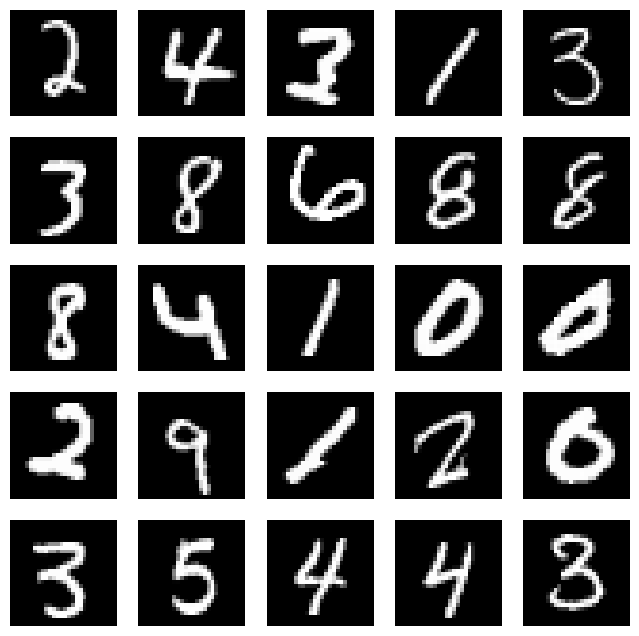

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
print(f"Trian Date size: {len(training_data)}")
print(f"Test Date size: {len(test_data)}")

print('')
collector = {k: 0 for k in range(10)}
for img, label  in training_data:
  collector[label] += 1
print(
    pd.DataFrame([{"label": k, "n_samples": n} for k, n in collector.items()])
    )

print('')

img, label = training_data[0]
print(f"Iamge dimension: {img.shape}")
print(f'min value of a pixel: {img.min()}, max value of a pixel: {img.max()}')

Trian Date size: 60000
Test Date size: 10000

   label  n_samples
0      0       5923
1      1       6742
2      2       5958
3      3       6131
4      4       5842
5      5       5421
6      6       5918
7      7       6265
8      8       5851
9      9       5949

Iamge dimension: torch.Size([1, 28, 28])
min value of a pixel: 0.0, max value of a pixel: 1.0


## Example of an Image:


label: 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000

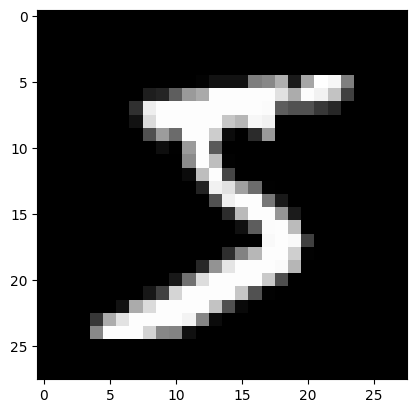

In [5]:
img, label = training_data[0]

print(f"label: {label}")

print(img)
plt.imshow(img.squeeze(), cmap="gray")


## Create DataLoader and shuffel data

In [6]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

# Define Neural Networks

In [7]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Train the model

In [9]:
loss_function = nn.CrossEntropyLoss()
# CrossEntropyLoss is combination of softmax and cross-entropy!!

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
epochs = 10

test(loaded_test, model, loss_function)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

Test Error: 
 Accuracy: 11.2%, Avg loss: 2.306269 

Epoch 1
-------------------------------
loss: 2.302231  [    0/60000]
Test Error: 
 Accuracy: 96.7%, Avg loss: 0.105075 

Epoch 2
-------------------------------
loss: 0.057242  [    0/60000]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.069174 

Epoch 3
-------------------------------
loss: 0.035192  [    0/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.066609 

Epoch 4
-------------------------------
loss: 0.073431  [    0/60000]
Test Error: 
 Accuracy: 98.0%, Avg loss: 0.068184 

Epoch 5
-------------------------------
loss: 0.019980  [    0/60000]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.080076 

Epoch 6
-------------------------------
loss: 0.015326  [    0/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.065709 

Epoch 7
-------------------------------
loss: 0.093006  [    0/60000]
Test Error: 
 Accuracy: 98.1%, Avg loss: 0.073357 

Epoch 8
-------------------------------
loss: 0.052096  [    0/60000]
